In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

In [2]:
# Loading productive habitat dataset
productive = pd.read_excel("Productive habitat all sites.xlsx")

# Loading unproductive habitat dataset
unproductive = pd.read_excel("Unproductive Habitats_all site.xlsx")


In [3]:
productive

,Week,Site,Socioeconomic_status,Habitat No,Season,Habitat Type,Vegetative Cover_%,Landuse_types,No. of Dips,Perimeter (m),...,Salinity_ppt,TDS_ppm,Lat,Latitude,Long,Longitude,Elevation (m),Remarks,Productivity type,Unnamed: 35
0,Week1,Dodowa,Lower socioeconomic sites,DD006,Wet,Swamp,68.0,Road,14,28.08,...,0.10,139.0,53.999,5.899983,3.800,0.063333,55,0,Semi-productive,NaN
1,Week1,Dodowa,Lower socioeconomic sites,DD014,Wet,Swamp,24.0,Road,18,15.64,...,0.20,290.0,54.090,5.901500,3.861,0.064350,57,0,Productive,NaN
2,Week1,Dodowa,Lower socioeconomic sites,DD019,Wet,Puddle,0.0,Road,16,80.91,...,0.21,304.0,54.168,5.902800,3.904,0.065067,57,0,Productive,NaN
3,Week1,Dodowa,Lower socioeconomic sites,DD027,Wet,Swamp,46.0,Road,17,40.87,...,0.48,674.0,54.286,5.904767,3.979,0.066317,55,0,Productive,NaN
4,Week1,Dodowa,Lower socioeconomic sites,DD029,Wet,Drainage pitch,5.0,Road,16,49.60,...,0.32,450.0,53.609,5.893483,4.223,0.070383,53,0,Semi-productive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,Week7,Nima,Lower socioeconomic sites,Nim 003,Dry,Puddle,0.0,Pasture,0,0.00,...,0.00,0.0,35.449,5.590817,11.343,0.189050,40,PRO,Productive,NaN
239,Week7,Nima,Lower socioeconomic sites,Nim 004,Dry,Drainage pitch,80.0,Road,7,29.20,...,0.69,0.0,35.570,5.592833,11.261,0.187683,40,Dry,Productive,NaN
240,Week7,Nima,Lower socioeconomic sites,Nim 005,Dry,Drainage pitch,0.0,Road,5,0.00,...,0.00,0.0,35.581,5.593017,11.240,0.187333,41,Dry,Semi-productive,NaN
241,Week7,Nima,Lower socioeconomic sites,Nim 007,Dry,Drainage pitch,0.0,Road,0,0.00,...,0.00,0.0,35.586,5.593100,11.354,0.189233,40,Dry,Semi-productive,NaN


In [4]:
unproductive

,Week,Site,Socioeconomic_status,Habitat No,Season,Habitat Type,Vegetative Cover_%,Landuse_types,No. of Dips,Perimeter (m),...,EC_uS,Salinity_ppt,TDS_ppm,Lat,Latitude,Long,Longitude,Elevation (m),Remarks,Productivity type
0,Week1,Dodowa,Lower socioeconomic sites,DD003,Wet,Puddle,0.0,Road,14,20.160,...,480.00,0.24,340.00,54.991,5.916517,3.817,0.063617,52,0,Unproductive
1,Week1,Dodowa,Lower socioeconomic sites,DD004,Wet,Puddle,0.0,Road,15,7.840,...,515.00,0.26,368.00,54.985,5.916417,3.821,0.063683,54,0,Unproductive
2,Week1,Dodowa,Lower socioeconomic sites,DD005,Wet,Swamp,72.0,Road,18,34.770,...,320.00,0.16,227.00,53.992,5.899867,3.811,0.063517,54,0,Unproductive
3,Week1,Dodowa,Lower socioeconomic sites,DD010,Wet,Puddle,13.0,Road,14,26.660,...,233.00,0.16,166.00,54.040,5.900667,3.727,0.062117,51,0,Unproductive
4,Week1,Dodowa,Lower socioeconomic sites,DD017,Wet,Puddle,13.0,Road,16,4.550,...,522.00,0.26,3668.00,54.147,5.902450,3.896,0.064933,55,0,Unproductive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Week6,Nima,Lower socioeconomic sites,Nim 008,Dry,Drainage pitch,100.0,Road,0,2.375,...,2.92,2.92,2.15,35.351,5.589183,11.602,0.193367,33,NaN,Unproductive
147,Week7,Nima,Lower socioeconomic sites,Nim 001,Dry,Drainage pitch,80.0,Road,0,2.500,...,0.00,0.00,0.00,35.409,5.590150,11.444,0.190733,47,Dry,Unproductive
148,Week7,Nima,Lower socioeconomic sites,Nim 002,Dry,Swamp,0.0,Pasture,0,0.000,...,0.00,0.00,0.00,35.523,5.592050,11.315,0.188583,41,Dry,Unproductive
149,Week7,Nima,Lower socioeconomic sites,Nim 006,Dry,Drainage ditch,0.0,Road,0,0.000,...,0.00,0.00,0.00,35.577,5.592950,11.242,0.187367,43,Dry,Unproductive


In [24]:
productive.describe().T

,count,mean,std,min,25%,50%,75%,max
Vegetative Cover_%,243.0,15.004115,26.056518,0.000000,0.000000,1.000000,15.000000,98.000000
No. of Dips,243.0,10.230453,7.720611,0.000000,5.000000,10.000000,15.000000,40.000000
Perimeter (m),243.0,8.430041,20.433895,0.000000,0.100000,1.200000,7.350000,150.000000
Depth (cm),243.0,5.145679,10.142710,0.000000,0.100000,0.500000,7.000000,62.000000
Length,243.0,3.385597,3.660341,0.000000,0.600000,2.200000,5.100000,18.000000
Width,243.0,1.244198,1.816745,0.000000,0.200000,0.500000,1.700000,10.000000
L1-L2,242.0,2.698347,5.748166,0.000000,0.000000,0.000000,3.000000,50.000000
L3-L4,243.0,3.283951,8.752192,0.000000,0.000000,1.000000,5.000000,120.000000
Pupa,243.0,0.604938,2.189451,0.000000,0.000000,0.000000,0.000000,25.000000
Total,243.0,6.502058,14.285858,0.000000,0.000000,2.000000,8.000000,185.000000


In [25]:
unproductive.describe().T

,count,mean,std,min,25%,50%,75%,max
Vegetative Cover_%,151.0,16.705298,29.367610,0.000000,0.000000,0.000000,15.000000,100.000000
No. of Dips,151.0,9.715232,7.360596,0.000000,4.500000,10.000000,15.000000,28.000000
Perimeter (m),151.0,5.365093,8.852756,0.000000,0.000000,1.600000,7.920000,41.440000
Depth (cm),151.0,6.830464,10.879308,0.000000,0.000000,0.500000,9.500000,48.000000
Length,151.0,3.385430,3.166563,0.000000,0.000000,2.500000,6.000000,11.000000
Width,151.0,1.046093,1.371738,0.000000,0.000000,0.600000,1.250000,5.800000
L1-L2,151.0,0.284768,1.377812,0.000000,0.000000,0.000000,0.000000,10.000000
L3-L4,151.0,0.284768,1.457749,0.000000,0.000000,0.000000,0.000000,15.000000
Pupa,151.0,0.046358,0.290695,0.000000,0.000000,0.000000,0.000000,2.000000
Total,151.0,0.615894,2.470792,0.000000,0.000000,0.000000,0.000000,16.000000


In [51]:
unproductive.columns, productive.columns

(Index(['Week', 'Site', 'Socioeconomic_status', 'Habitat No', 'Season',
        'Habitat Type', 'Vegetative Cover_%', 'Landuse_types', 'No. of Dips',
        'Perimeter (m)', 'Depth (cm)', 'Length', 'Width', 'L1-L2', 'L3-L4',
        'Pupa', 'Total', 'Larval Density', 'Culex',
        'Distance nearest to human settlement', 'Presence of Algae',
        'Surface Debris', 'Emergent plant', 'pH', 'Temp_C', 'EC_uS',
        'Salinity_ppt', 'TDS_ppm', 'Lat', 'Latitude ', 'Long', 'Longitude',
        'Elevation (m)', 'Remarks', 'Productivity type'],
       dtype='object'),
 Index(['Week', 'Site', 'Socioeconomic_status', 'Habitat No', 'Season',
        'Habitat Type', 'Vegetative Cover_%', 'Landuse_types', 'No. of Dips',
        'Perimeter (m)', 'Depth (cm)', 'Length', 'Width', 'L1-L2', 'L3-L4',
        'Pupa', 'Total', 'Larval Density', 'Culex',
        'Distance nearest to human settlement', 'Presence of Algae',
        'Surface Debris', 'Emergent plant', 'pH', 'Temp_C', 'EC_uS',
        'S

# Compute Odds Ratio

In [10]:
(productive['Larval Density'].values > 0).sum()

128

In [9]:
larval_A = (productive['Larval Density'].values > 0).sum()
larval_B = (productive['Larval Density'].values == 0).sum()
larval_C = (unproductive['Larval Density'].values > 0).sum()
larval_D = (unproductive['Larval Density'].values == 0).sum()

In [16]:
 df['productive'] / df['unproductive']

larval D. present    14.222222
larval D. absent      0.809859
dtype: float64

In [20]:
# Create a DataFrame with the given row and column labels
data = {
    'productive': [larval_A, larval_B],
    'unproductive': [larval_C, larval_D]
}

index = ['larval D. present', 'larval D. absent']

df = pd.DataFrame(data, index=index)

# compute the odds

odds_p = df.loc['larval D. present', 'productive']/df.loc['larval D. absent', 'productive']
odds_up = df.loc['larval D. present', 'unproductive']/df.loc['larval D. absent', 'unproductive']

# Add another index and append values to the columns
additional_index = 'Odds'
additional_values = {'productive':odds_p, 'unproductive': odds_up}
df.loc[additional_index] = additional_values

# # Display the DataFrame
df

,productive,unproductive
larval D. present,128.000000,9.00000
larval D. absent,115.000000,142.00000
Odds,1.113043,0.06338


In [18]:
# df

* $\rm {odds \, of \,larval \,Density \,in \,Productive = \frac{number \,of \,productive \,with \,larval \,density}{number \,of \,productive \,without \,larval \,density}}=\frac{128}{115}=1.113043$

* $\rm {odds \,of \,larval \,Density \,in \,Unproductive = \frac{number \,of \,unproductive \,with \,larval \,density}{number \,of \,unproductive \,without \,larval \,density}}=\frac{9}{142}=0.06338$

*  $\rm {Odds \,Ratio = \frac{Odds \,of \,larval \,density \,in \,productive}{Odds \,of \,larval \,density \,in \,unproductive}}=\frac{1.113043}{0.06338}=17.56142$

# Distribution of selected features in your data

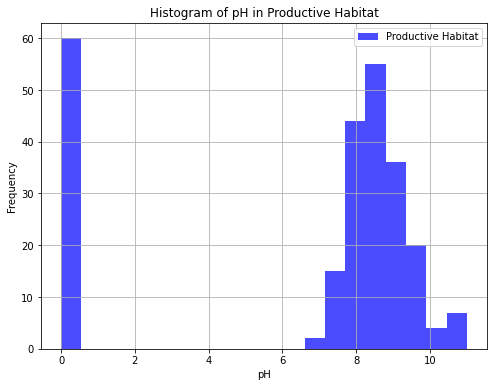

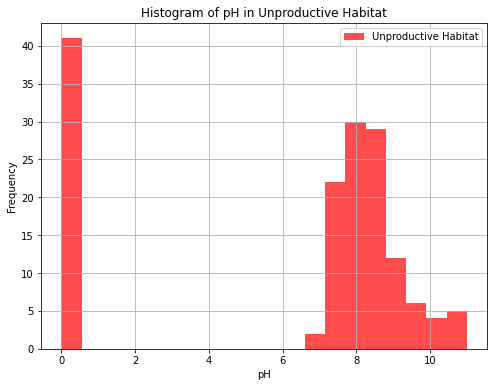

In [70]:
# Plot histogram for Productive habitat
plt.figure(figsize=(8, 6))
plt.hist(productive['pH'], bins=20, color='blue', alpha=0.7, label='Productive Habitat')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title('Histogram of pH in Productive Habitat')
plt.legend()
plt.grid(True)
plt.show()

# Plot histogram for Unproductive habitat
plt.figure(figsize=(8, 6))
plt.hist(unproductive['pH'], bins=20, color='red', alpha=0.7, label='Unproductive Habitat')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title('Histogram of pH in Unproductive Habitat')
plt.legend()
plt.grid(True)
plt.show()

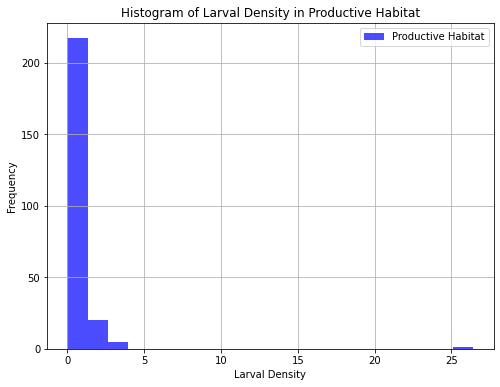

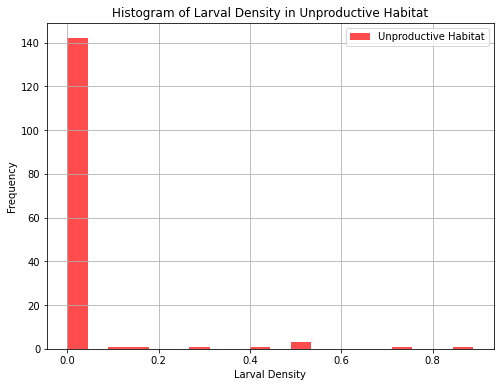

In [71]:
# Plot histogram for Productive habitat
plt.figure(figsize=(8, 6))
plt.hist(productive['Larval Density'], bins=20, color='blue', alpha=0.7, label='Productive Habitat')
plt.xlabel('Larval Density')
plt.ylabel('Frequency')
plt.title('Histogram of Larval Density in Productive Habitat')
plt.legend()
plt.grid(True)
plt.show()

# Plot histogram for Unproductive habitat
plt.figure(figsize=(8, 6))
plt.hist(unproductive['Larval Density'], bins=20, color='red', alpha=0.7, label='Unproductive Habitat')
plt.xlabel('Larval Density')
plt.ylabel('Frequency')
plt.title('Histogram of Larval Density in Unproductive Habitat')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
# Flagging zero pH values
productive_df = productive[productive['pH'] != 0]
unproductive_df = unproductive[unproductive['pH'] != 0]


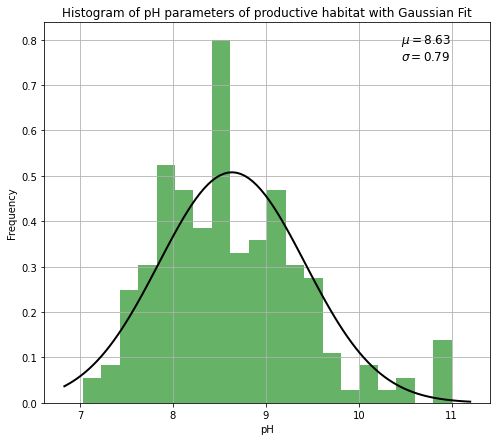

In [73]:
# Extract pH parameter data
pH_data = productive_df['pH']

# Plot histogram
plt.figure(figsize=(8, 7))
plt.hist(pH_data, bins=20, density=True, alpha=0.6, color='g')

# Fit Gaussian (normal) distribution
mu, std = norm.fit(pH_data)

# Plot the fitted Gaussian
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Annotate the plot with mean and standard deviation
plt.text(0.8, 0.9, f'$\mu={mu:.2f}$\n$\sigma={std:.2f}$', transform=plt.gca().transAxes, fontsize=12)

# Set labels and title
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title('Histogram of pH parameters of productive habitat with Gaussian Fit')

# Show plot
plt.grid(True)
plt.show()

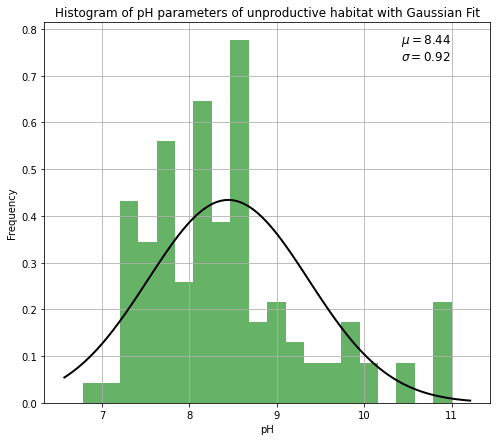

In [74]:
# Extract pH parameter unproductive data
pH_data = unproductive_df['pH']

# Plot histogram
plt.figure(figsize=(8, 7))
plt.hist(pH_data, bins=20, density=True, alpha=0.6, color='g')

# Fit Gaussian (normal) distribution
mu, std = norm.fit(pH_data)

# Plot the fitted Gaussian
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Annotate the plot with mean and standard deviation
plt.text(0.8, 0.9, f'$\mu={mu:.2f}$\n$\sigma={std:.2f}$', transform=plt.gca().transAxes, fontsize=12)

# Set labels and title
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title('Histogram of pH parameters of unproductive habitat with Gaussian Fit')

# Show plot
plt.grid(True)
plt.show()